# Program untuk kasus $L_q$ Weiszfeld untuk Titik tidak tunggal

## Install dan Import Library, Membaca Dataset

In [ ]:
pip install matplotlib cartopy numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 30.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid = pd.read_csv("/content/drive/MyDrive/Test TA/covid-19 data v2.csv")
covid

,country,code,confirmed,recovered,critical,deaths,lastChange,lastUpdate,latitude,longitude,altitude,information,altidude (m)
0,Andorra,AD,48015,47563,0,165,2024-02-11T22:05:54+00:00,2024-08-09T09:13:41+00:00,42.546245,1.601554,0.017793,NaN,1977.0
1,UAE,AE,1067030,1054525,0,2349,2024-02-11T22:01:57+00:00,2024-08-09T09:13:41+00:00,25.218247,55.242192,-0.000009,Dubai,-1.0
2,Afghanistan,AF,234174,211080,0,7996,2024-06-04T00:18:51+00:00,2024-08-09T09:13:41+00:00,33.939110,67.709953,0.033912,NaN,3768.0
3,Antigua and Barbuda,AG,9106,8954,0,146,2024-02-11T22:01:12+00:00,2024-08-09T09:13:41+00:00,17.060816,-61.796428,0.000603,NaN,67.0
4,Anguilla,AI,3904,3,0,12,2024-06-04T00:14:26+00:00,2024-08-09T09:13:41+00:00,18.216142,-63.062444,0.000216,The Valley,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Yemen,YE,11945,9124,0,2159,2024-02-11T22:02:34+00:00,2024-08-09T09:13:41+00:00,15.552727,48.516388,0.008919,NaN,991.0
244,Mayotte,YT,42027,2964,0,188,2024-06-04T00:19:24+00:00,2024-08-09T09:13:41+00:00,-12.780176,45.227044,0.000387,Mamoudzou,43.0
245,South Africa,ZA,4076463,3912506,192,102595,2024-02-11T22:15:25+00:00,2024-08-09T09:13:41+00:00,-30.559482,22.937506,0.009963,NaN,1107.0
246,Zambia,ZM,349304,341316,0,4069,2024-06-04T00:26:18+00:00,2024-08-09T09:13:41+00:00,-13.133897,27.849332,0.010845,NaN,1205.0


In [ ]:
points = covid[['country','longitude', 'latitude','altitude']]
points = points.loc[points['altitude']>0]
points

,country,longitude,latitude,altitude
0,Andorra,1.601554,42.546245,0.017793
2,Afghanistan,67.709953,33.939110,0.033912
3,Antigua and Barbuda,-61.796428,17.060816,0.000603
4,Anguilla,-63.062444,18.216142,0.000216
5,Albania,20.168331,41.153332,0.001404
...,...,...,...,...
243,Yemen,48.516388,15.552727,0.008919
244,Mayotte,45.227044,-12.780176,0.000387
245,South Africa,22.937506,-30.559482,0.009963
246,Zambia,27.849332,-13.133897,0.010845


In [ ]:
points = points[['longitude', 'latitude']].values.tolist()
points = np.array(points)
points

array([[ 1.60155400e+00,  4.25462450e+01],
       [ 6.77099530e+01,  3.39391100e+01],
       [-6.17964280e+01,  1.70608160e+01],
       [-6.30624440e+01,  1.82161420e+01],
       [ 2.01683310e+01,  4.11533320e+01],
       [ 4.50381890e+01,  4.00690990e+01],
       [ 1.78738870e+01, -1.12026920e+01],
       [ 1.66624024e+02, -7.78426950e+01],
       [-6.36166720e+01, -3.84160970e+01],
       [ 1.45500720e+01,  4.75162310e+01],
       [ 1.33775136e+02, -2.52743980e+01],
       [-7.00367920e+01,  1.25190400e+01],
       [ 1.76790760e+01,  4.39158860e+01],
       [-5.95431980e+01,  1.31938870e+01],
       [ 9.03563310e+01,  2.36849940e+01],
       [ 4.46993600e+00,  5.05038870e+01],
       [-1.56159300e+00,  1.22383330e+01],
       [ 2.54858300e+01,  4.27338830e+01],
       [ 2.99188860e+01, -3.37305600e+00],
       [ 2.31583400e+00,  9.30769000e+00],
       [-6.28524910e+01,  1.78968420e+01],
       [-6.47533700e+01,  3.23094660e+01],
       [ 1.14727669e+02,  4.53527700e+00],
       [-6.

# Algoritma $L_q$ Weiszfeld

Hard Clustering

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


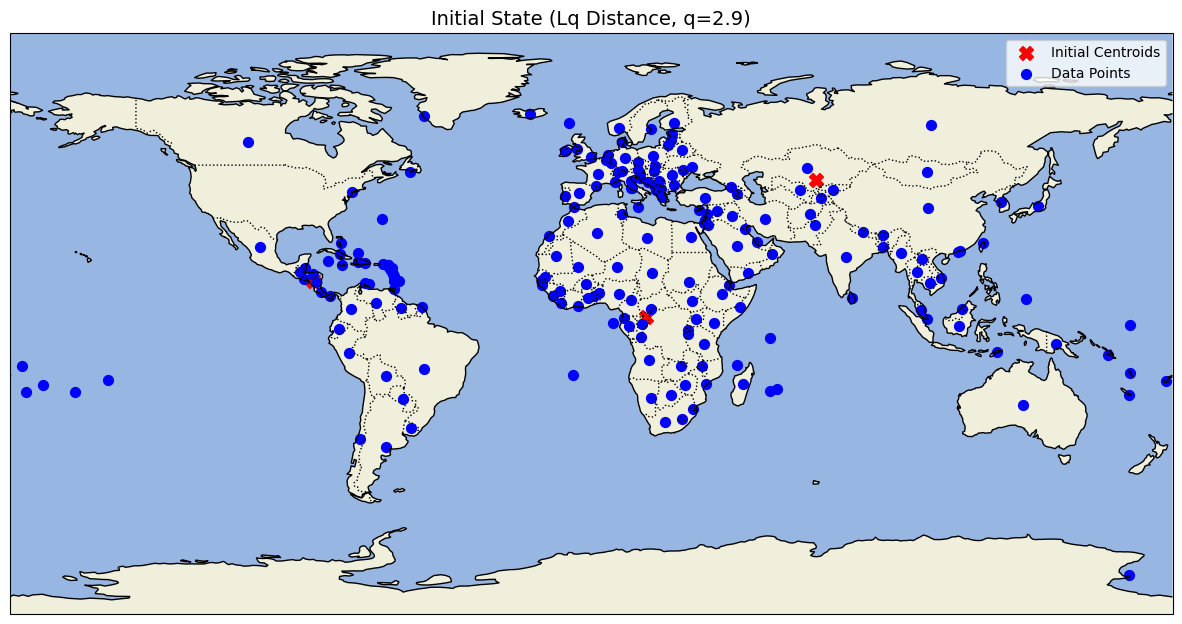

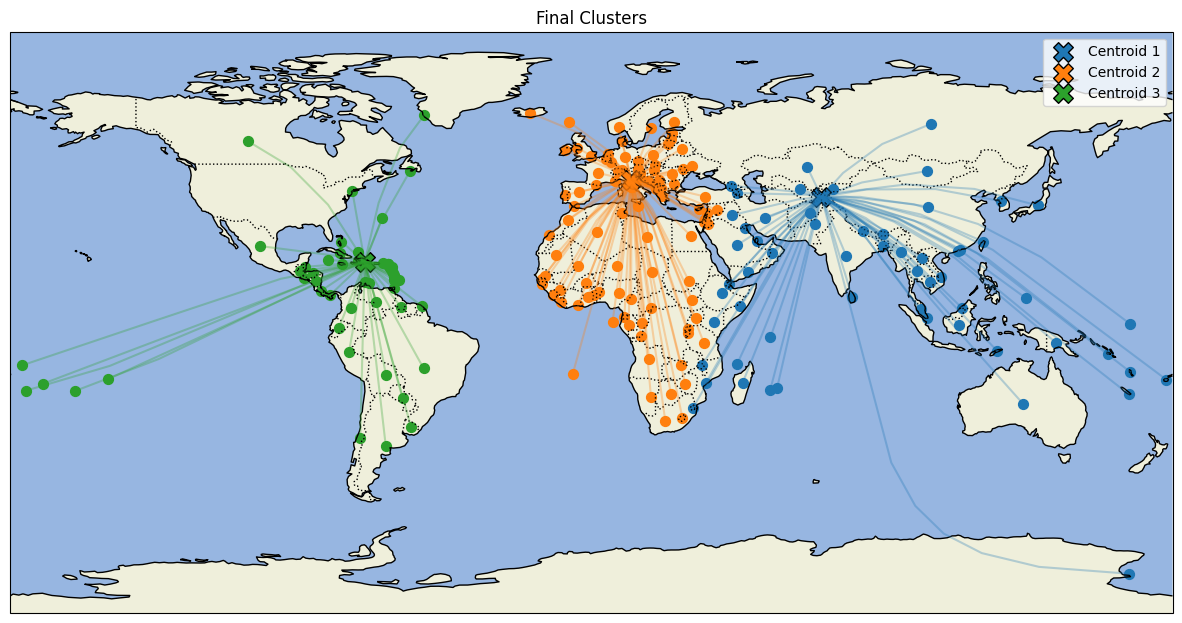

Optimized Centroids (Lq, q=2.99):
Centroid 1: (71.277275, 38.851203)
Centroid 2: (12.457779, 43.942359)
Centroid 3: (-70.153738, 18.718008)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def lq_distance(p1, p2, q=2.1):
    """Calculate Lq distance between two points with power order q"""
    return ((abs(p1[0] - p2[0])**q) + (abs(p1[1] - p2[1])**q)) ** (1/q)

def weiszfeld_multi_facility(points, weights, initial_centroids, q=2.1, max_iter=1000, tol=1e-6):
    """
    Lq-Weiszfeld algorithm for multi-facility location problem using Lq distance.

    Parameters:
    - points: list of (latitude, longitude) tuples
    - weights: list of weights for each point
    - initial_centroids: list of initial centroids
    - q: power order for Lq distance (default: 2.1)
    - max_iter: maximum iterations
    - tol: convergence tolerance

    Returns:
    - optimized centroids
    - cluster assignments
    """
    K = len(initial_centroids)
    N = len(points)
    centroids = initial_centroids.copy()

    # Initial visualization
    fig1 = plt.figure(figsize=(15, 10))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.set_global()

    # Plot initial state
    initial_lons, initial_lats = zip(*initial_centroids)
    ax1.scatter(initial_lons, initial_lats, color='red', s=100,
                marker='X', label='Initial Centroids', transform=ccrs.PlateCarree())
    point_lons, point_lats = zip(*points)
    ax1.scatter(point_lons, point_lats, color='blue', s=50,
                label='Data Points', transform=ccrs.PlateCarree())
    plt.title(f'Initial State (Lq Distance, q={q})', fontsize=14)
    plt.legend()
    plt.show()

    # Main algorithm
    for iteration in range(max_iter):
        # Assignment step (using Lq distance)
        clusters = [[] for _ in range(K)]
        assignments = []
        for i in range(N):
            distances = [lq_distance(points[i], c, q) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(i)
            assignments.append(cluster_idx)

        # Update step (Lq weights)
        new_centroids = []
        for k in range(K):
            cluster_points = [points[i] for i in clusters[k]]
            cluster_weights = [weights[i] for i in clusters[k]]

            if not cluster_points:  # Empty cluster
                new_centroids.append(centroids[k])
                continue

            current_centroid = centroids[k]
            is_data_point = any(np.allclose(current_centroid, p) for p in cluster_points)

            if is_data_point:
                idx = next(i for i, p in enumerate(cluster_points)
                          if np.allclose(current_centroid, p))
                R_lat, R_lon = 0.0, 0.0
                for i, (lat, lon) in enumerate(cluster_points):
                    if i == idx:
                        continue
                    dist = lq_distance((lat, lon), current_centroid, q)
                    if dist > 0:
                        weight = cluster_weights[i] / (dist ** (q - 1))  # Lq weight adjustment
                        R_lat += weight * (lat - current_centroid[0])
                        R_lon += weight * (lon - current_centroid[1])

                R_norm = (abs(R_lat)**q + abs(R_lon)**q) ** (1/q)
                w_j = cluster_weights[idx]
                if R_norm > w_j:
                    step_size = (R_norm - w_j) / R_norm
                    new_lat = current_centroid[0] + step_size * R_lat
                    new_lon = current_centroid[1] + step_size * R_lon
                    new_centroids.append((new_lat, new_lon))
                else:
                    new_centroids.append(current_centroid)
            else:
                # Regular Lq-Weiszfeld update
                sum_weights, sum_lat, sum_lon = 0.0, 0.0, 0.0
                for i, (lat, lon) in enumerate(cluster_points):
                    dist = lq_distance((lat, lon), current_centroid, q)
                    if dist > 0:
                        weight = cluster_weights[i] / (dist ** (q - 1))  # Lq weight adjustment
                        sum_weights += weight
                        sum_lat += weight * lat
                        sum_lon += weight * lon
                if sum_weights > 0:
                    new_centroids.append((sum_lat / sum_weights, sum_lon / sum_weights))
                else:
                    new_centroids.append(current_centroid)

        # Check convergence
        converged = all(lq_distance(centroids[k], new_centroids[k], q) < tol for k in range(K))
        centroids = new_centroids
        if converged:
            break

    # Final visualization
    fig2 = plt.figure(figsize=(15, 10))
    ax2 = plt.axes(projection=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    ax2.set_global()

    colors = plt.cm.tab10.colors
    point_lons, point_lats = zip(*points)
    for i, (lon, lat) in enumerate(zip(point_lons, point_lats)):
        ax2.scatter(lon, lat, color=colors[assignments[i] % len(colors)],
                    s=50, transform=ccrs.PlateCarree())

    centroid_lons, centroid_lats = zip(*centroids)
    for k, (lon, lat) in enumerate(zip(centroid_lons, centroid_lats)):
        ax2.scatter(lon, lat, color=colors[k % len(colors)], s=200,
                    marker='X', edgecolor='black', linewidth=1,
                    label=f'Centroid {k+1}', transform=ccrs.PlateCarree())

    for i, (point, assign) in enumerate(zip(points, assignments)):
        centroid = centroids[assign]
        ax2.plot([point[0], centroid[0]], [point[1], centroid[1]],
                color=colors[assign % len(colors)], alpha=0.3,
                transform=ccrs.Geodetic())

    plt.title(f'Final Clusters')
    plt.legend()
    plt.show()

    return centroids, assignments
weights = [1.0] * len(points)
#Initial Centroids
initial_centroids = [
    (69.55000000000001,44.25),  # c1
    (17.05291,2.07035),         # c2
    (-86.32000000000001,13.18857142857143)  # c3
]

# Run with q=2.1
optimized_centroids, assignments = weiszfeld_multi_facility(
    points, weights, initial_centroids, q=2.9)

print("Optimized Centroids (Lq, q=2.99):")
for i, (lat, lon) in enumerate(optimized_centroids):
    print(f"Centroid {i+1}: ({lat:.6f}, {lon:.6f})")

Probabilistic Assignments (Lengkap dengan Indeks $Xie-Beni$)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


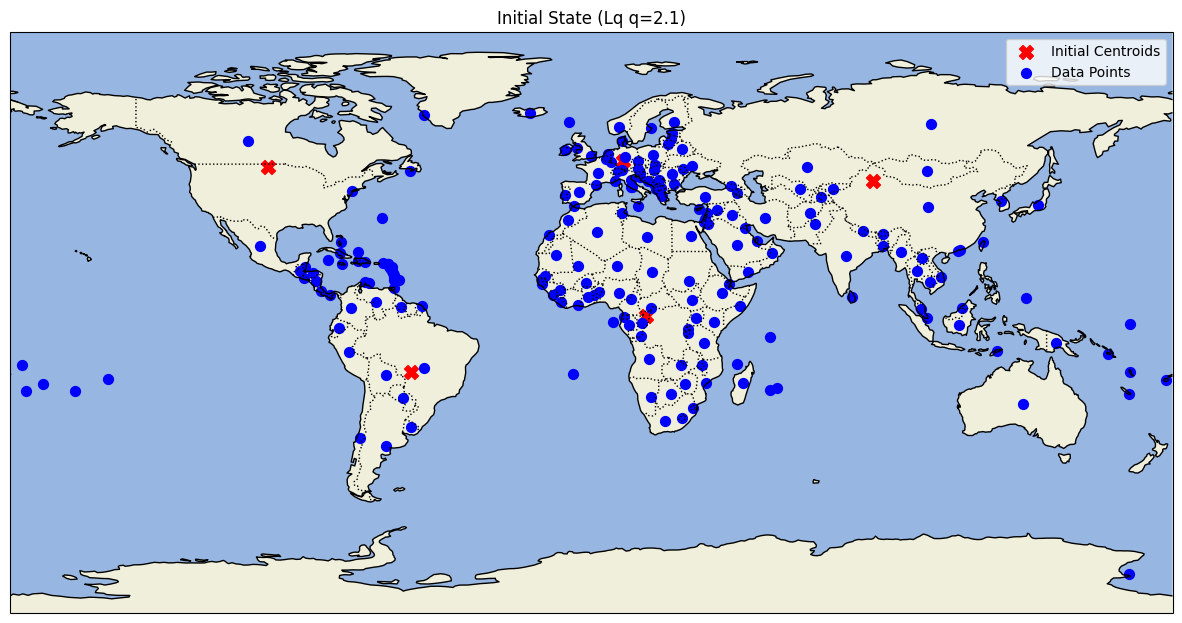

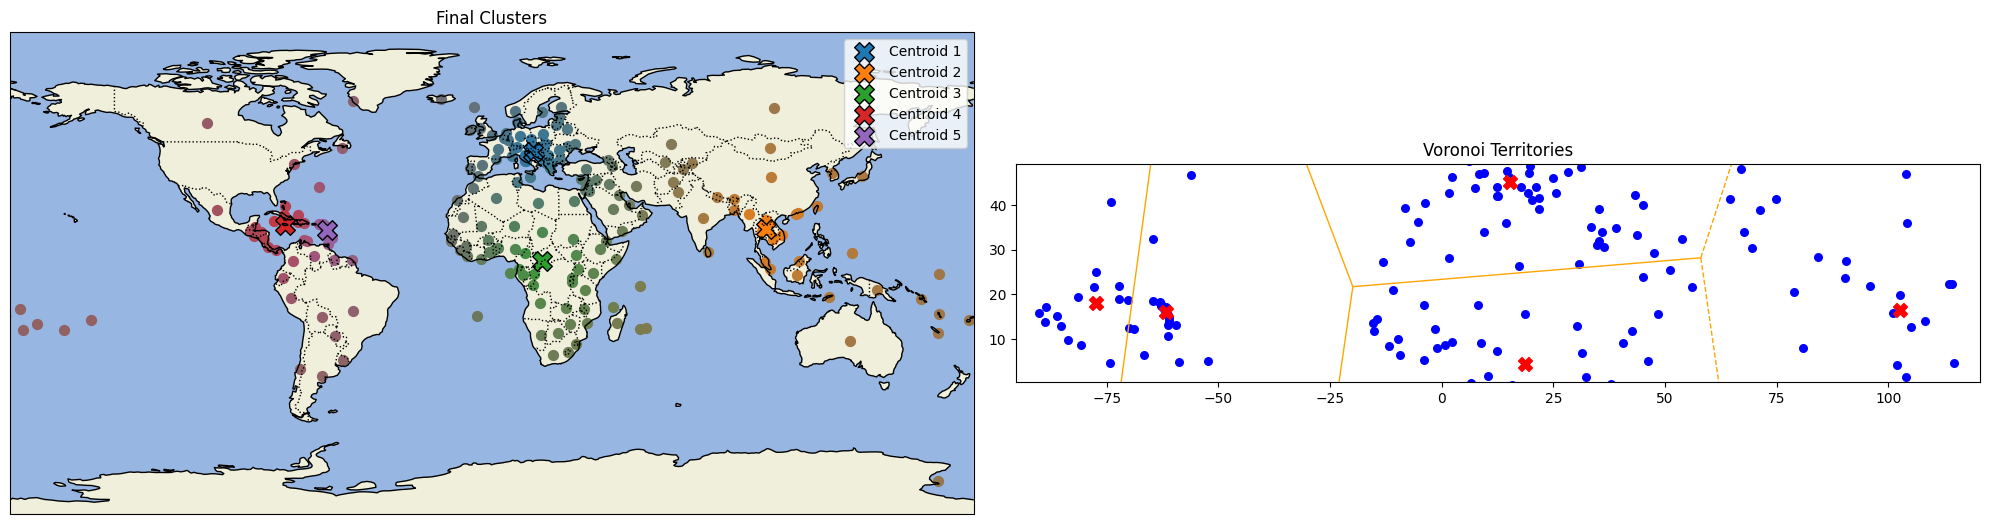

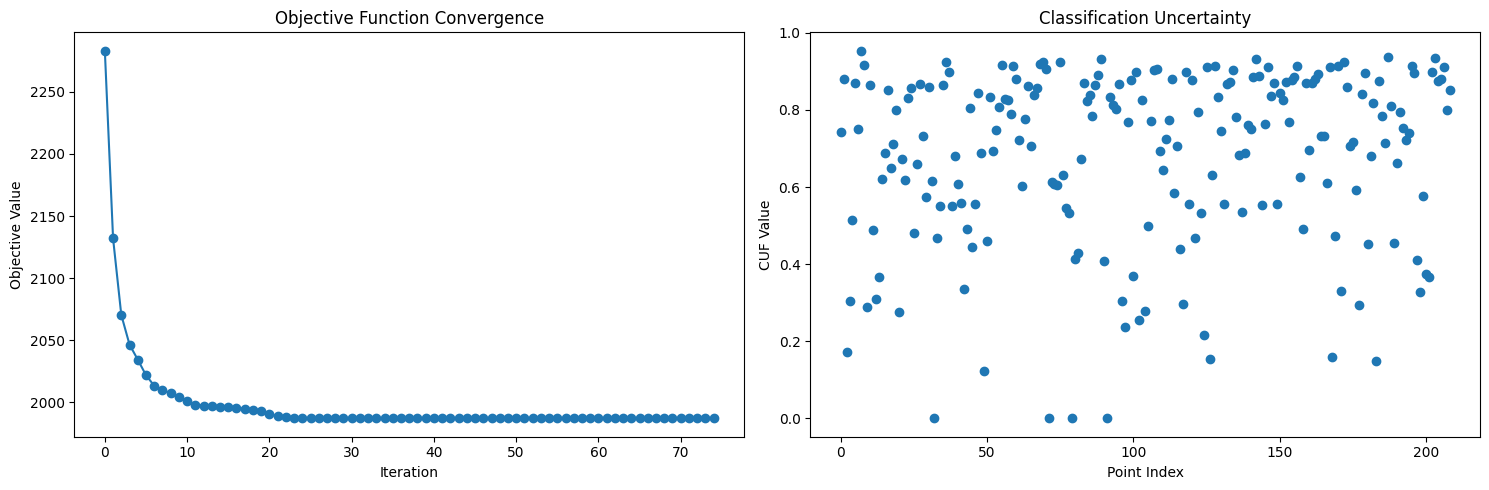

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.spatial import Voronoi, voronoi_plot_2d

def lq_distance(p1, p2, q=2.1):
    """Calculate Lq distance between two points with power order q"""
    return (abs(p1[0] - p2[0])**q + abs(p1[1] - p2[1])**q) ** (1/q)

def calculate_probabilities(points, centroids, q=2.1):
    """Update cluster membership probabilities using Lq distances"""
    K = len(centroids)
    N = len(points)
    probabilities = np.zeros((N, K))

    for i in range(N):
        distances = [lq_distance(points[i], c, q) for c in centroids]

        if min(distances) < 1e-10:  # Handle point coinciding with centroid
            probabilities[i] = np.zeros(K)
            probabilities[i][np.argmin(distances)] = 1.0
            continue

        numerators = []
        for k in range(K):
            numerator = 1.0
            for j in range(K):
                if j != k:
                    numerator *= distances[j]
            numerators.append(numerator)

        denominator = sum(numerators)
        probabilities[i] = [num/denominator for num in numerators]

    return probabilities

def calculate_jdf(points, centroids, q=2.1):
    """Calculate Joint Distance Function with Lq distances"""
    K = len(centroids)
    N = len(points)
    jdf_values = np.zeros(N)

    for i in range(N):
        distances = [lq_distance(points[i], c, q) for c in centroids]
        numerator = np.prod(distances)

        denominator = 0.0
        for k in range(K):
            term = 1.0
            for m in range(K):
                if m != k:
                    term *= distances[m]
            denominator += term

        jdf_values[i] = numerator / denominator if denominator > 0 else 0.0

    return jdf_values

def generalized_weiszfeld(points, weights, initial_centroids, q=2.1, max_iter=1000, tol=1e-6):
    """Complete Lq-Weiszfeld algorithm with proper visualization"""
    K = len(initial_centroids)
    N = len(points)
    centroids = initial_centroids.copy()
    objective_values = []

    # Validate input
    points = np.array(points)
    if points.shape[1] != 2:
        raise ValueError("Points must be 2D coordinates")

    # Initial visualization
    fig1 = plt.figure(figsize=(15, 10))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.set_global()

    # Plot initial state
    initial_lons, initial_lats = zip(*initial_centroids)
    ax1.scatter(initial_lons, initial_lats, color='red', s=100,
                marker='X', label='Initial Centroids', transform=ccrs.PlateCarree())
    point_lons, point_lats = zip(*points)
    ax1.scatter(point_lons, point_lats, color='blue', s=50,
                label='Data Points', transform=ccrs.PlateCarree())
    plt.title(f'Initial State (Lq q={q})')
    plt.legend()
    plt.show()

    # Main optimization loop
    for iteration in range(max_iter):
        probabilities = calculate_probabilities(points, centroids, q)
        new_centroids = []

        for k in range(K):
            current_centroid = centroids[k]

            if any(np.allclose(current_centroid, p) for p in points):
                new_centroids.append(current_centroid)
                continue

            weights_sum = 0.0
            weighted_points = np.zeros(2)

            for i in range(N):
                dist = lq_distance(points[i], current_centroid, q)
                if dist > 1e-10:
                    weight = (probabilities[i, k]**2 * weights[i]) / (dist**(q-1))
                    weighted_points += weight * np.array(points[i])
                    weights_sum += weight

            new_centroid = weighted_points / weights_sum if weights_sum > 0 else current_centroid
            new_centroids.append(tuple(new_centroid))

        # Calculate objective function
        current_objective = sum(
            probabilities[i, k]**2 * weights[i] * lq_distance(points[i], new_centroids[k], q)
            for i in range(N) for k in range(K)
        )
        objective_values.append(current_objective)

        # Check convergence
        if all(lq_distance(centroids[k], new_centroids[k], q) < tol for k in range(K)):
            break
        centroids = new_centroids

    # Final calculations
    probabilities = calculate_probabilities(points, centroids, q)
    jdf_values = calculate_jdf(points, centroids, q)
    cuf_values = K * np.prod(probabilities, axis=1)**(1/K) if K > 1 else np.zeros(N)

    # Final visualizations
    fig2 = plt.figure(figsize=(20, 8))

    # Geographic plot
    ax1 = fig2.add_subplot(121, projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.set_global()

    colors = plt.cm.tab10.colors
    for i in range(N):
        color = sum(np.array(colors[k][:3]) * probabilities[i, k] for k in range(K))
        ax1.scatter(points[i, 0], points[i, 1], color=color, s=50, transform=ccrs.PlateCarree())

    for k in range(K):
        ax1.scatter(centroids[k][0], centroids[k][1], color=colors[k], edgecolors='black', s=200,
                   marker='X', label=f'Centroid {k+1}', transform=ccrs.PlateCarree())
    ax1.set_title(f'Final Clusters')
    ax1.legend()

    # Voronoi plot
    ax2 = fig2.add_subplot(122)
    vor = Voronoi(np.array([(c[0], c[1]) for c in centroids]))  # Convert to (lon, lat)
    voronoi_plot_2d(vor, ax=ax2, show_points=False, show_vertices=False, line_colors='orange')
    ax2.scatter(points[:, 0], points[:, 1], color='blue', s=30)
    ax2.scatter([c[0] for c in centroids], [c[1] for c in centroids],
                color='red', s=100, marker='X')
    ax2.set_title('Voronoi Territories')
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.show()

    # Metrics plots
    fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))
    ax3.plot(objective_values, marker='o')
    ax3.set_title('Objective Function Convergence')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Objective Value')

    ax4.scatter(range(N), cuf_values)
    ax4.set_title('Classification Uncertainty')
    ax4.set_xlabel('Point Index')
    ax4.set_ylabel('CUF Value')
    plt.tight_layout()
    plt.show()

    return centroids, probabilities, jdf_values, cuf_values, objective_values

weights = [1.0]*len(points)
# Initial centroids
initial_centroids = [
    (9.90205525,49.84300044),   # c1
    (87.33110993,43.68111316),  # c2
    (17.05291,2.07035),         # c3
    (-100.1666667,48.1666667),  # c4
    (-55.75,-15.4608333),        # c5
]

results = generalized_weiszfeld(points, weights, initial_centroids, q=2.1)

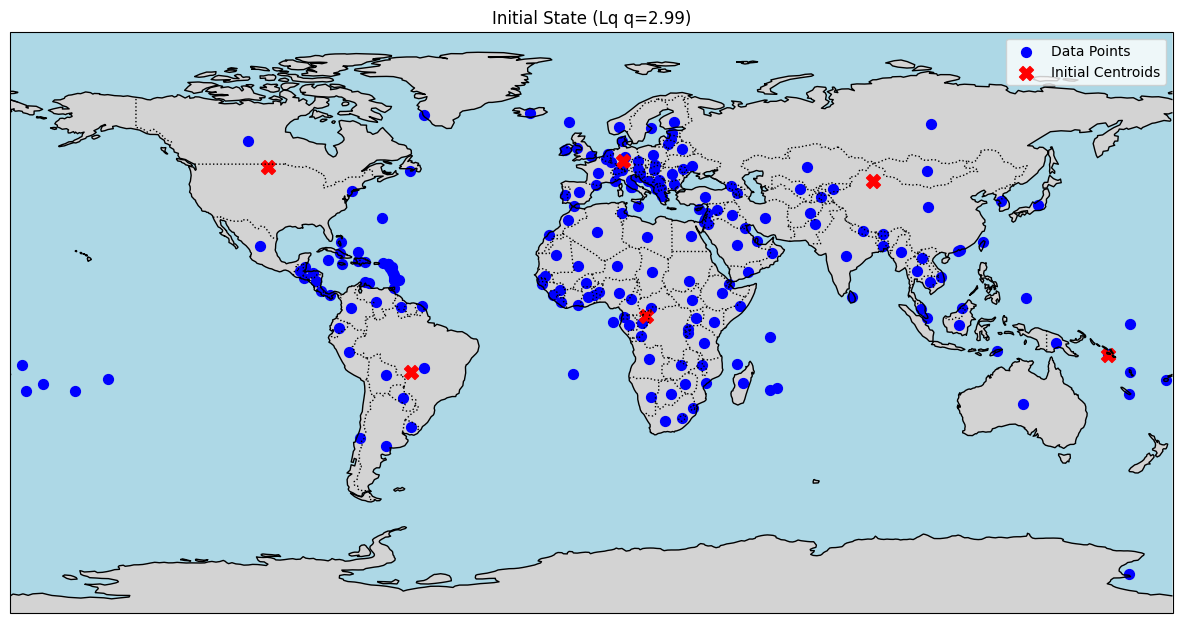

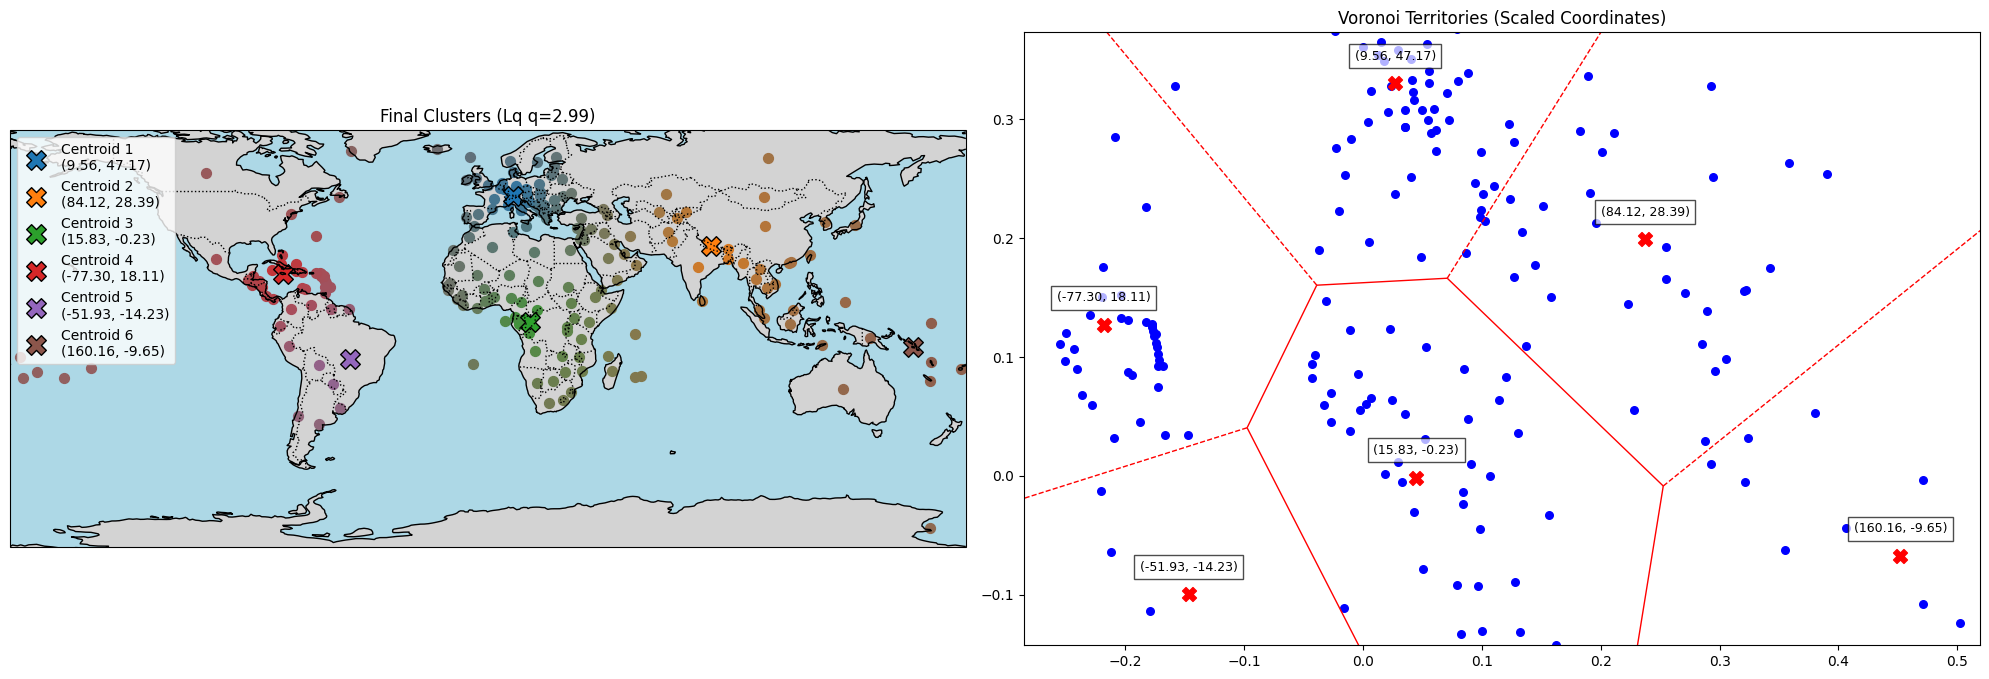

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.spatial import Voronoi, voronoi_plot_2d

def lq_distance(p1, p2, q=2.1):
    """Calculate Lq distance between two points"""
    return (abs(p1[0] - p2[0])**q + abs(p1[1] - p2[1])**q) ** (1/q)

def calculate_probabilities(points, centroids, q=2.1):
    """Calculate cluster membership probabilities"""
    K = len(centroids)
    N = len(points)
    probabilities = np.zeros((N, K))

    for i in range(N):
        distances = [lq_distance(points[i], c, q) for c in centroids]

        if min(distances) < 1e-10:
            probabilities[i] = np.zeros(K)
            probabilities[i][np.argmin(distances)] = 1.0
            continue

        numerators = [np.prod([distances[j] for j in range(K) if j != k]) for k in range(K)]
        denominator = sum(numerators)
        probabilities[i] = [num/denominator for num in numerators]

    return probabilities

def generalized_weiszfeld(points, weights, initial_centroids, q=2.1, max_iter=1000, tol=1e-6):
    """Complete working Lq-Weiszfeld algorithm"""
    K = len(initial_centroids)
    N = len(points)
    centroids = [np.array(c) for c in initial_centroids]
    objective_values = []

    # Input validation
    points = np.array(points)
    if points.shape[1] != 2:
        raise ValueError("Points must be 2D coordinates")

    # Initial visualization
    fig1 = plt.figure(figsize=(15, 10))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, facecolor='lightgray')
    ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.set_global()

    # Plot initial state
    ax1.scatter(*zip(*[(p[0], p[1]) for p in points]), color='blue', s=50,
                transform=ccrs.PlateCarree(), label='Data Points')
    ax1.scatter(*zip(*[(c[0], c[1]) for c in centroids]), color='red', s=100,
                marker='X', transform=ccrs.PlateCarree(), label='Initial Centroids')
    plt.title(f'Initial State (Lq q={q})')
    plt.legend()
    plt.show()

    # Main algorithm
    for iteration in range(max_iter):
        probabilities = calculate_probabilities(points, centroids, q)
        new_centroids = []

        for k in range(K):
            current = centroids[k]

            if any(np.allclose(current, p) for p in points):
                new_centroids.append(current)
                continue

            weights_sum = 0.0
            weighted_sum = np.zeros(2)

            for i in range(N):
                dist = lq_distance(points[i], current, q)
                if dist > 1e-10:
                    w = (probabilities[i,k]**2 * weights[i]) / (dist**(q-1))
                    weighted_sum += w * points[i]
                    weights_sum += w

            new_centroids.append(weighted_sum/weights_sum if weights_sum > 0 else current)

        # Check convergence
        if all(lq_distance(c1, c2, q) < tol for c1, c2 in zip(centroids, new_centroids)):
            break

        centroids = new_centroids

    # Final calculations
    probabilities = calculate_probabilities(points, centroids, q)

    # Final visualization
    fig2 = plt.figure(figsize=(20, 8))

    # Cluster plot
    ax1 = fig2.add_subplot(121, projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, facecolor='lightgray')
    ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')

    colors = plt.cm.tab10.colors
    for i in range(N):
        color = sum(np.array(colors[k][:3]) * probabilities[i,k] for k in range(K))
        ax1.scatter(points[i,0], points[i,1], color=color, s=50, transform=ccrs.PlateCarree())

    for k in range(K):
        ax1.scatter(centroids[k][0], centroids[k][1], color=colors[k],edgecolor='black', s=200,
                   marker='X', transform=ccrs.PlateCarree(),
                   label=f'Centroid {k+1}\n({centroids[k][0]:.2f}, {centroids[k][1]:.2f})')
    ax1.set_title(f'Final Clusters (Lq q={q})')
    ax1.legend()

    # Voronoi plot - using Cartesian coordinates with proper scaling
    ax2 = fig2.add_subplot(122)

    # Scale coordinates to reasonable range
    all_points = np.vstack([points, centroids])
    x_scale = 1.0/(max(all_points[:,0]) - min(all_points[:,0]))
    y_scale = 1.0/(max(all_points[:,1]) - min(all_points[:,1]))
    scaled_centroids = np.array([(c[0]*x_scale, c[1]*y_scale) for c in centroids])

    vor = Voronoi(scaled_centroids)
    voronoi_plot_2d(vor, ax=ax2, show_points=False, show_vertices=False, line_colors='red')

    # Plot scaled points
    scaled_points = np.array([(p[0]*x_scale, p[1]*y_scale) for p in points])
    ax2.scatter(scaled_points[:,0], scaled_points[:,1], color='blue', s=30)

    # Plot scaled centroids with original coordinates in labels
    for k, (x, y) in enumerate(scaled_centroids):
        ax2.scatter(x, y, color='red', s=100, marker='X')
        ax2.text(x, y+0.02, f'({centroids[k][0]:.2f}, {centroids[k][1]:.2f})',
                ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

    ax2.set_title('Voronoi Territories (Scaled Coordinates)')
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.show()

    return centroids, probabilities

weights = [1.0]*len(points)
# Initial centroids
initial_centroids = [
    (9.90205525,49.84300044),   # c1
    (87.33110993,43.68111316),  # c2
    (17.05291,2.07035),         # c3
    (-100.1666667,48.1666667),  # c4
    (-55.75,-15.4608333),        # c5
    (160,-10)
]

results = generalized_weiszfeld(points, weights, initial_centroids, q=2.99)

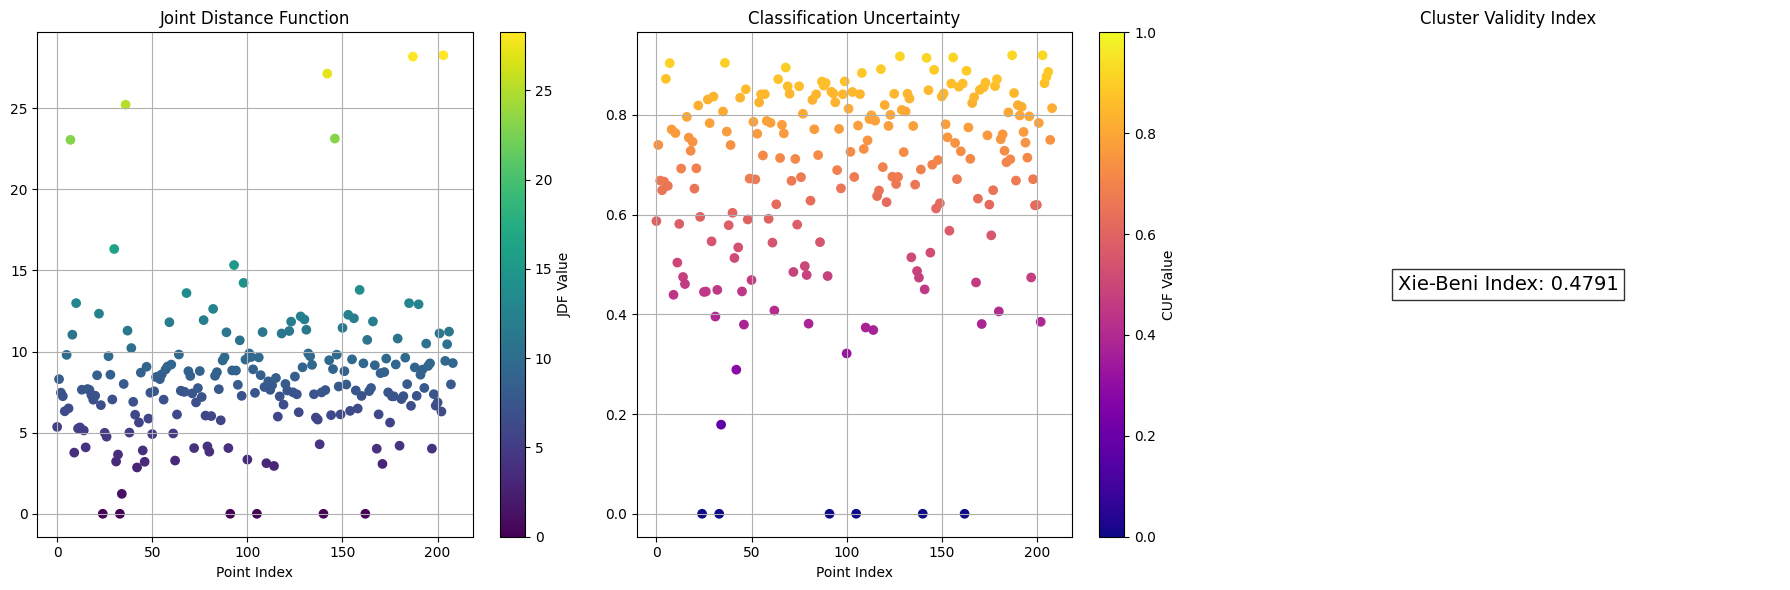


Final Xie-Beni Index: 0.4791
Mean JDF: 8.3002
Mean CUF: 0.6850


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import Normalize

def lq_distance(p1, p2, q=2.1):
    """Calculate Lq distance between two points"""
    return (abs(p1[0] - p2[0])**q + abs(p1[1] - p2[1])**q) ** (1/q)

def calculate_probabilities(points, centroids, q=2.1):
    """Calculate cluster membership probabilities"""
    K = len(centroids)
    N = len(points)
    probabilities = np.zeros((N, K))

    for i in range(N):
        distances = [lq_distance(points[i], c, q) for c in centroids]

        if min(distances) < 1e-10:
            probabilities[i] = np.zeros(K)
            probabilities[i][np.argmin(distances)] = 1.0
            continue

        numerators = [np.prod([distances[j] for j in range(K) if j != k]) for k in range(K)]
        denominator = sum(numerators)
        probabilities[i] = [num/denominator for num in numerators]

    return probabilities

def calculate_jdf(points, centroids, q=2.1):
    """Calculate Joint Distance Function"""
    K = len(centroids)
    N = len(points)
    jdf_values = np.zeros(N)

    for i in range(N):
        distances = [lq_distance(points[i], c, q) for c in centroids]
        numerator = np.prod(distances)
        denominator = sum([np.prod([distances[m] for m in range(K) if m != k]) for k in range(K)])
        jdf_values[i] = numerator / denominator if denominator > 0 else 0.0

    return jdf_values

def calculate_cuf(probabilities):
    """Calculate Classification Uncertainty Function"""
    K = probabilities.shape[1]
    return K * np.prod(probabilities, axis=1)**(1/K) if K > 1 else np.zeros(len(probabilities))

def calculate_xie_beni(points, centroids, assignments, q=2.1):
    """Calculate Xie-Beni cluster validity index"""
    K = len(centroids)
    N = len(points)

    # Calculate WGSS (within-group sum of squares)
    wgss = sum(lq_distance(points[i], centroids[assignments[i]], q)**2 for i in range(N))

    # Calculate minimum inter-centroid distance
    if K > 1:
        min_dist_sq = min(lq_distance(centroids[i], centroids[j], q)**2
                      for i in range(K) for j in range(i+1, K))
    else:
        min_dist_sq = 1.0  # Handle single cluster case

    return (wgss/N) / min_dist_sq

def generalized_weiszfeld(points, weights, initial_centroids, q=2.1, max_iter=1000, tol=1e-6):
    """Complete Lq-Weiszfeld algorithm with all metrics"""
    K = len(initial_centroids)
    N = len(points)
    centroids = [np.array(c) for c in initial_centroids]
    objective_values = []

    # Input validation
    points = np.array(points)
    if points.shape[1] != 2:
        raise ValueError("Points must be 2D coordinates")

    # Main algorithm
    for iteration in range(max_iter):
        probabilities = calculate_probabilities(points, centroids, q)
        new_centroids = []

        for k in range(K):
            current = centroids[k]

            if any(np.allclose(current, p) for p in points):
                new_centroids.append(current)
                continue

            weights_sum = 0.0
            weighted_sum = np.zeros(2)

            for i in range(N):
                dist = lq_distance(points[i], current, q)
                if dist > 1e-10:
                    w = (probabilities[i,k]**2 * weights[i]) / (dist**(q-1))
                    weighted_sum += w * points[i]
                    weights_sum += w

            new_centroids.append(weighted_sum/weights_sum if weights_sum > 0 else current)

        # Check convergence
        if all(lq_distance(c1, c2, q) < tol for c1, c2 in zip(centroids, new_centroids)):
            break

        centroids = new_centroids

    # Final calculations
    probabilities = calculate_probabilities(points, centroids, q)
    jdf_values = calculate_jdf(points, centroids, q)
    cuf_values = calculate_cuf(probabilities)
    assignments = np.argmax(probabilities, axis=1)
    xie_beni = calculate_xie_beni(points, centroids, assignments, q)

    # Create figure for metrics
    fig_metrics = plt.figure(figsize=(18, 6))

    # JDF plot
    ax1 = fig_metrics.add_subplot(131)
    sc1 = ax1.scatter(range(N), jdf_values, c=jdf_values, cmap='viridis',
                     norm=Normalize(vmin=0, vmax=max(jdf_values)))
    plt.colorbar(sc1, ax=ax1, label='JDF Value')
    ax1.set_title(f'Joint Distance Function')
    ax1.set_xlabel('Point Index')
    ax1.grid(True)

    # CUF plot
    ax2 = fig_metrics.add_subplot(132)
    sc2 = ax2.scatter(range(N), cuf_values, c=cuf_values, cmap='plasma',
                     norm=Normalize(vmin=0, vmax=1 if K > 1 else 0))
    plt.colorbar(sc2, ax=ax2, label='CUF Value')
    ax2.set_title(f'Classification Uncertainty')
    ax2.set_xlabel('Point Index')
    ax2.grid(True)

    # Xie-Beni display
    ax3 = fig_metrics.add_subplot(133)
    ax3.text(0.5, 0.5, f'Xie-Beni Index: {xie_beni:.4f}',
            ha='center', va='center', fontsize=14,
            bbox=dict(facecolor='white', alpha=0.8))
    ax3.set_title('Cluster Validity Index')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

    return centroids, probabilities, jdf_values, cuf_values, xie_beni

weights = [1.0]*len(points)
# Initial centroids
initial_centroids = [
    (9.90205525,49.84300044),   # c1
    (87.33110993,43.68111316),  # c2
    (17.05291,2.07035),         # c3
    (-100.1666667,48.1666667),  # c4
    (-55.75,-15.4608333),        # c5
    (160,-10)
]

centroids, probabilities, jdf, cuf, xb = generalized_weiszfeld(
    points, weights, initial_centroids, q=2.99)

print(f"\nFinal Xie-Beni Index: {xb:.4f}")
print(f"Mean JDF: {np.mean(jdf):.4f}")
print(f"Mean CUF: {np.mean(cuf):.4f}")